In [1]:
import torch
import networkx as nx
import torch_geometric as pyg
from torch_geometric.utils import to_networkx, is_undirected
import matplotlib.pyplot as plt

In [2]:
data = torch.load('../data/model/pyg/hetero_graph_v1.pt')

In [18]:
G = nx.Graph()

In [19]:
customers = data['order'].edge_index[0]  # 假设这是你的客户节点列表
G.add_nodes_from(customers, node_type='customer')

In [20]:
products = data['order'].edge_index[1]
G.add_nodes_from(products, node_type='product')

In [ ]:
edges = [(customer, product) for customer, product in zip(customers, products)]
G.add_edges_from(edges)

In [4]:
degree_sequence = [d for n, d in G.degree()]
# 统计度分布
degree_count = nx.degree_histogram(G)

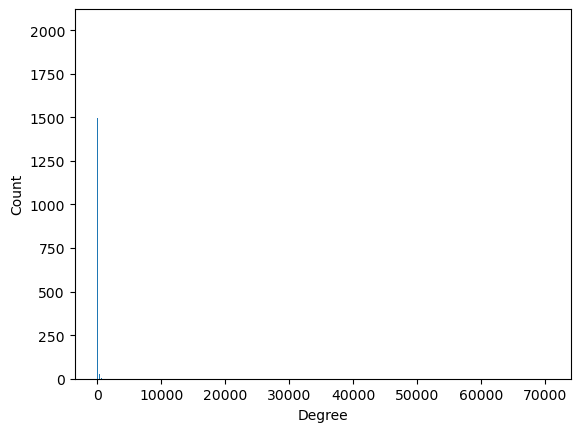

In [11]:
plt.bar(range(len(degree_count)), degree_count)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [9]:
connected_components = list(nx.connected_components(G))

In [10]:
connected_components

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [1]:
import torch

In [3]:
hetero_data = torch.load('../data/model/pyg/hetero_graph_v1.pt')

In [4]:
hetero_data

HeteroData(
  customer={
    x=[161086, 12],
    index=[161086],
  },
  product={
    x=[2708, 15],
    index=[2708],
  },
  (customer, order, product)={ edge_index=[2, 11892915] },
  (product, rev_order, customer)={ edge_index=[2, 11892915] }
)